In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Analiziranje dinamike cijene stanova po Hrvatskoj

## Pregled materijala

Korištenjem web-crawlera skupili smo 44000 oglasa sa Njuškalo.hr kako bi analizirali cijenu stanova.

Prvi dio prezentacije će biti fokusiran na nekoliko činjenica koje su fokusiranje na sve gradove hrvatske.

Drugi dio će analizirai 5 najskupljih i 5 najjeftinijih županija i njihovih gradova u više detalja.

Treći dio će isključivo gledati detalje Splitsko-Dalmatinske županije i samog Splita.

# Prvi dio

## Gradovi Hrvatske

### Najskuplji i najjeftiniji grad po cijeni kvadratnog metra

In [3]:
# Navigate to the data folder
os.chdir(os.path.join(os.getcwd(), os.pardir, "data"))
# Get the data in the dataframe
df = pd.read_csv('merged_data_filtered.csv')
# Get the cost per square meter
df['cost_per_sqm'] = df['price'] / df['livingArea']
# Calculate the average cost per square meter for each city
avg_cost_per_sqm = df.groupby('city')['cost_per_sqm'].mean().sort_values(ascending=False).reset_index()
# Show which city has the highest average cost per square meter
print(avg_cost_per_sqm.head(1))
# Show which city has the lowest average cost per square meter
print(avg_cost_per_sqm.tail(1))


      city  cost_per_sqm
0  Opatija   5861.951255
        city  cost_per_sqm
283  Vrgorac    310.077519


### Prosjek broja kupaonica po broju soba

In [4]:
# Calculate the ratio between the number of bathrooms and the number of rooms
df['bath_room_ratio'] = df['bathrooms with toilet'] / df['numberOfRooms']

df['bath_room_ratio'] = df['bath_room_ratio'].replace([np.inf, -np.inf], np.nan)  # Replace Inf values with NaN
df['bath_room_ratio'] = df['bath_room_ratio'].fillna(df['bath_room_ratio'].mean())

print("##############################################")
correlation = df['bath_room_ratio'].corr(df['price'])
print(f'Korelacija između broja kupaonica i soba: {correlation}')
print("##############################################")

X = sm.add_constant(df['bath_room_ratio'])
y = df['price']

model = sm.OLS(y, X).fit()
print("STATISTIČKA SIGNIFIKANTNOST:")
print(model.summary())
print("##############################################")

##############################################
Korelacija između broja kupaonica i soba: 0.060964775226385895
##############################################
STATISTIČKA SIGNIFIKANTNOST:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           1.36e-37
Time:                        14:24:13   Log-Likelihood:            -6.0093e+05
No. Observations:               44102   AIC:                         1.202e+06
Df Residuals:                   44100   BIC:                         1.202e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      co

### Prikaz prosjeka cijene po kvadratnom metru za sve gradove razdvojenim po grupama

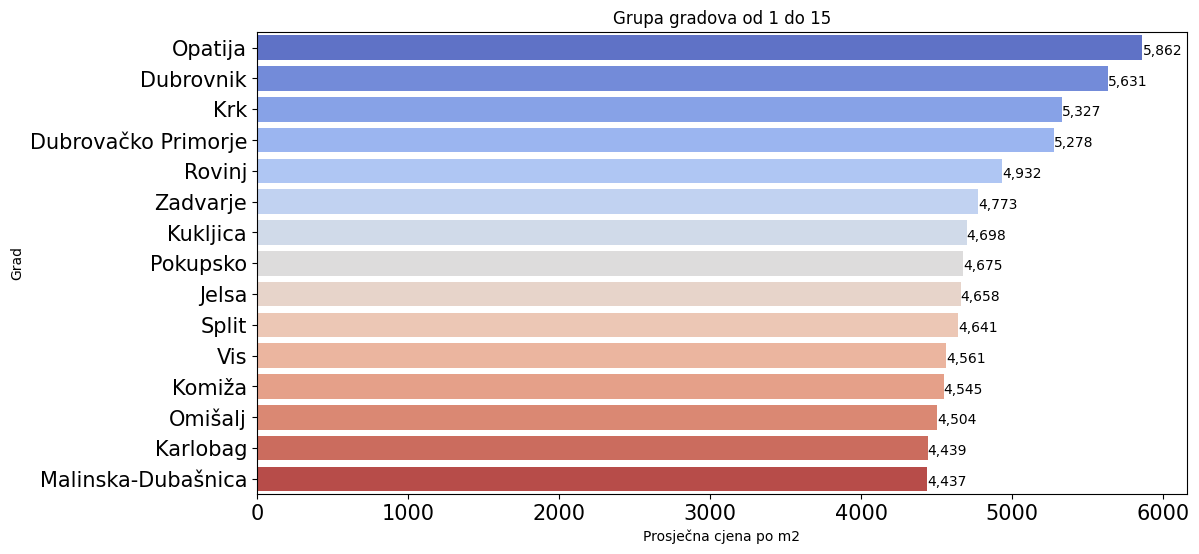

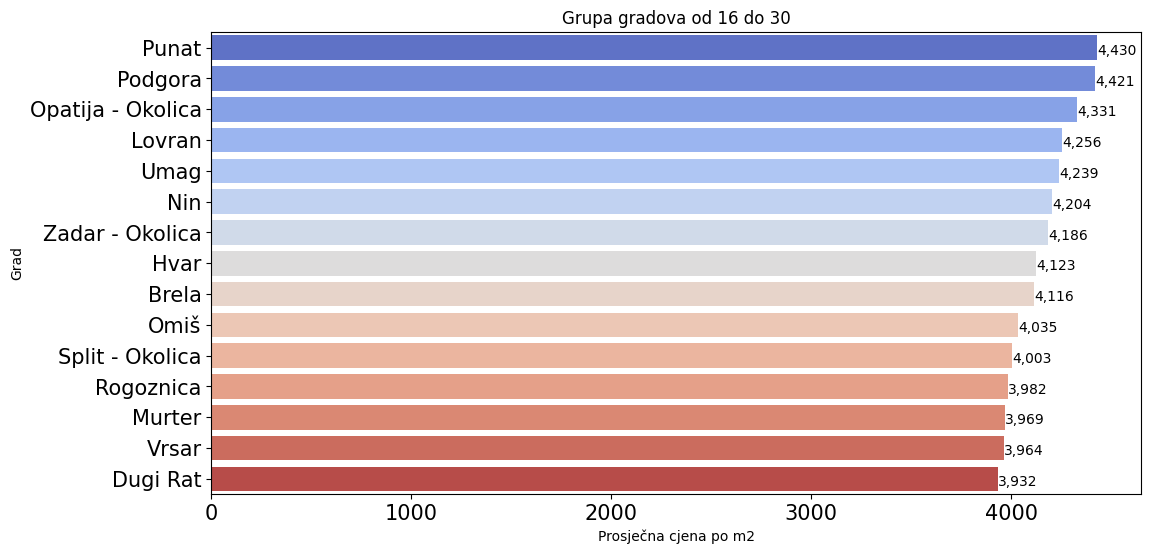

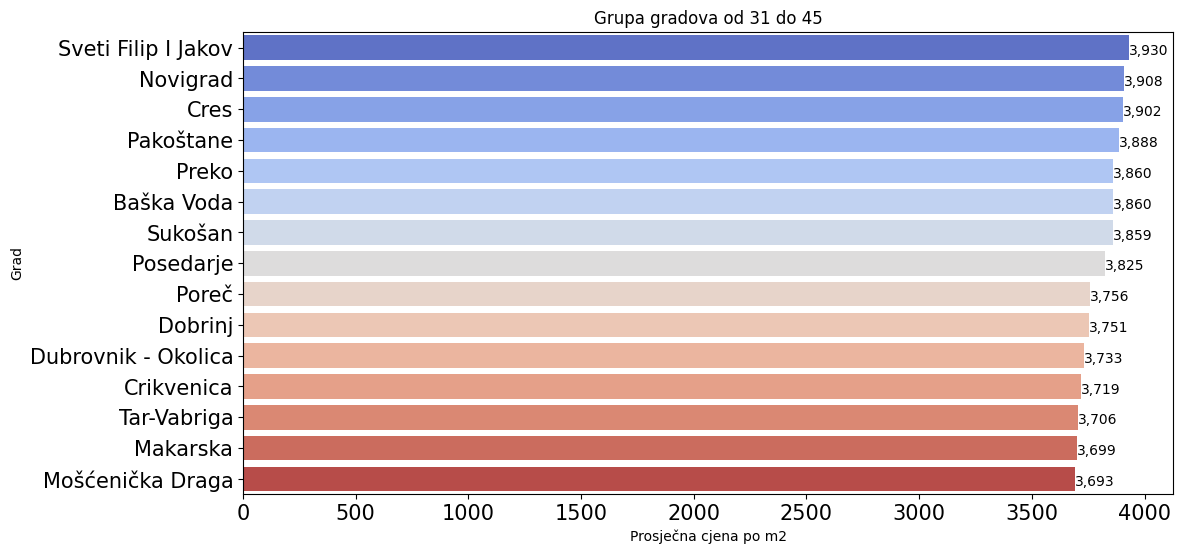

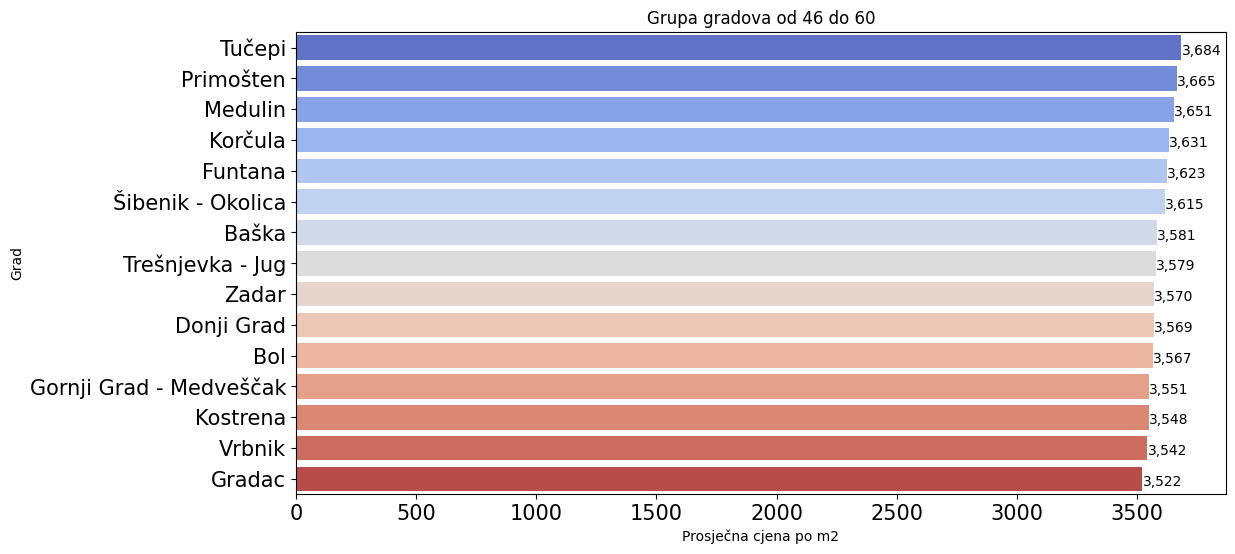

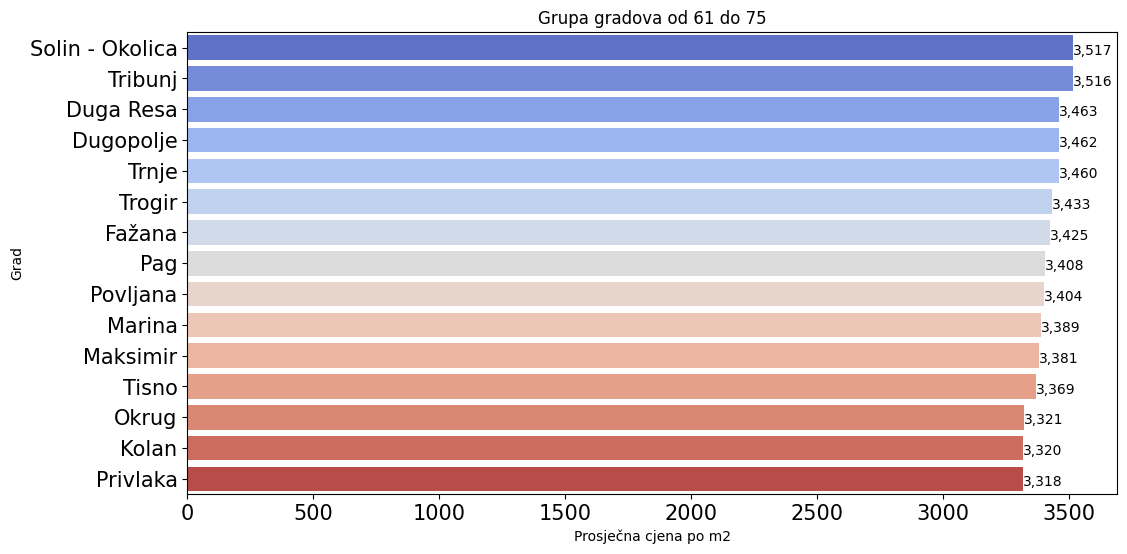

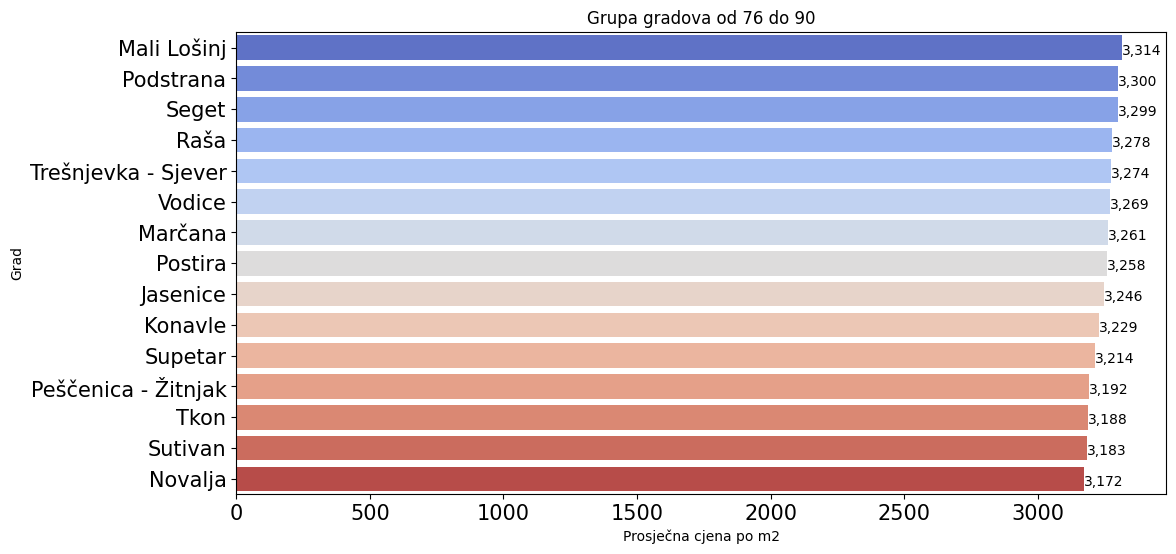

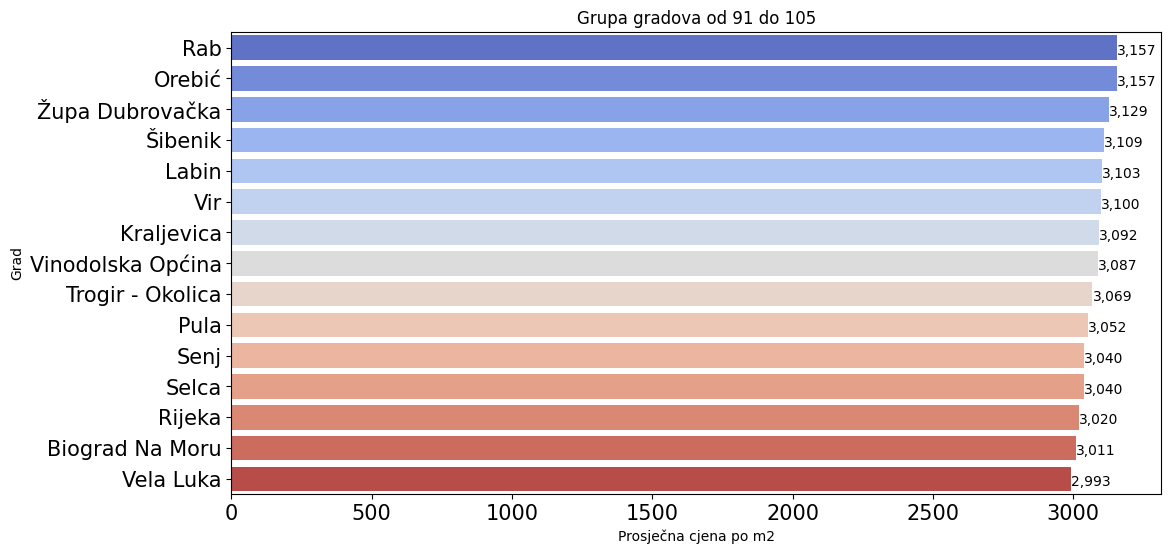

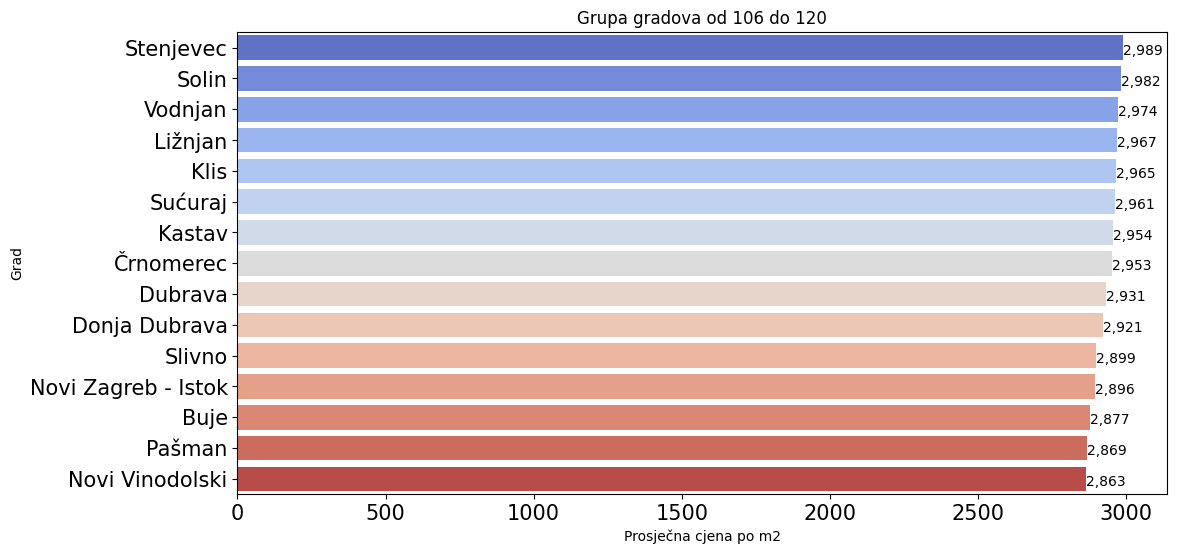

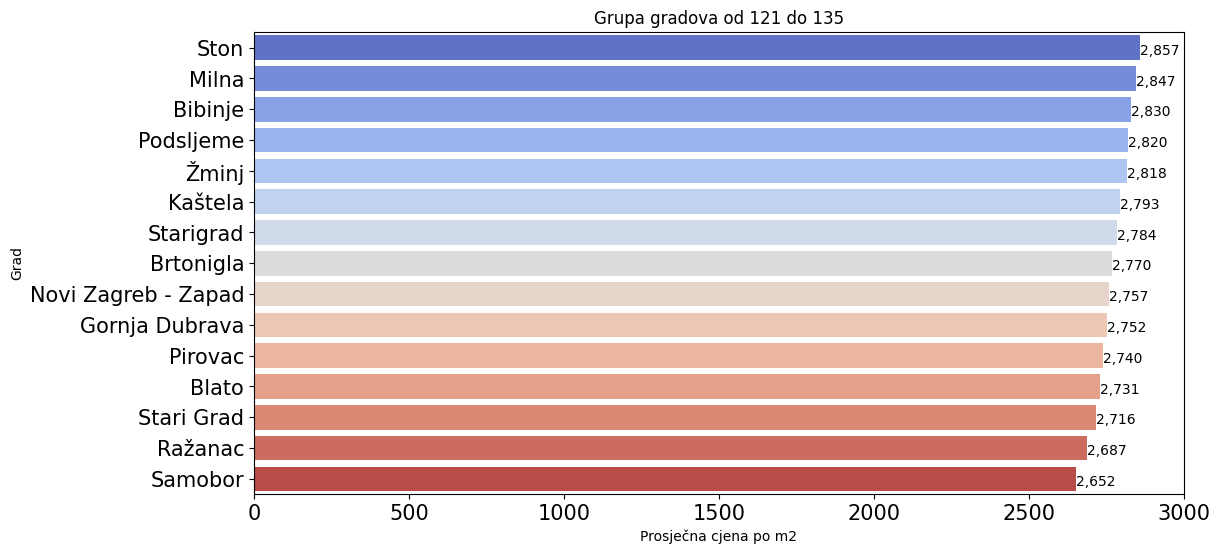

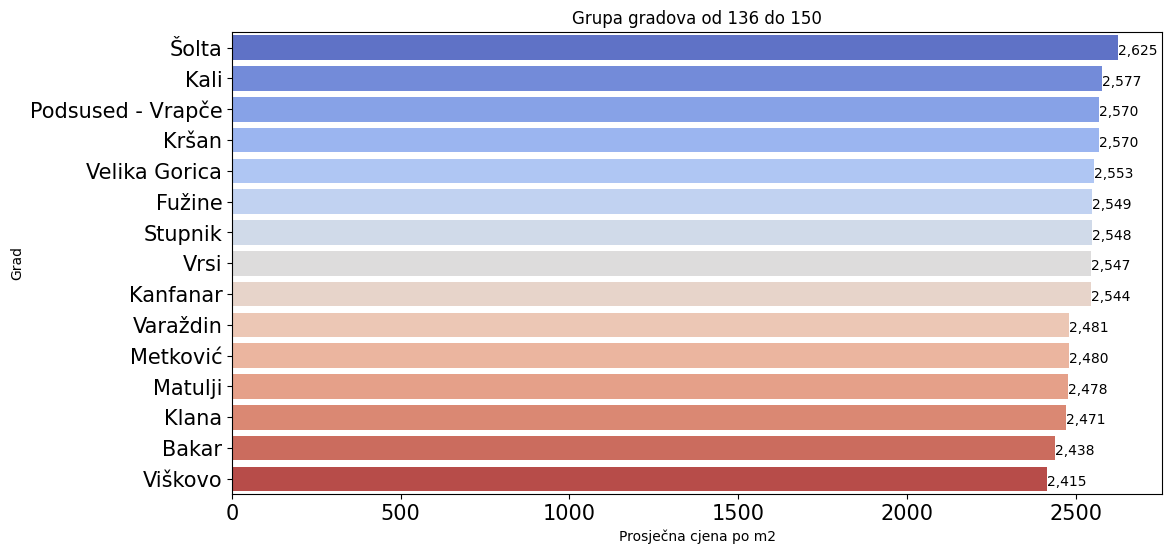

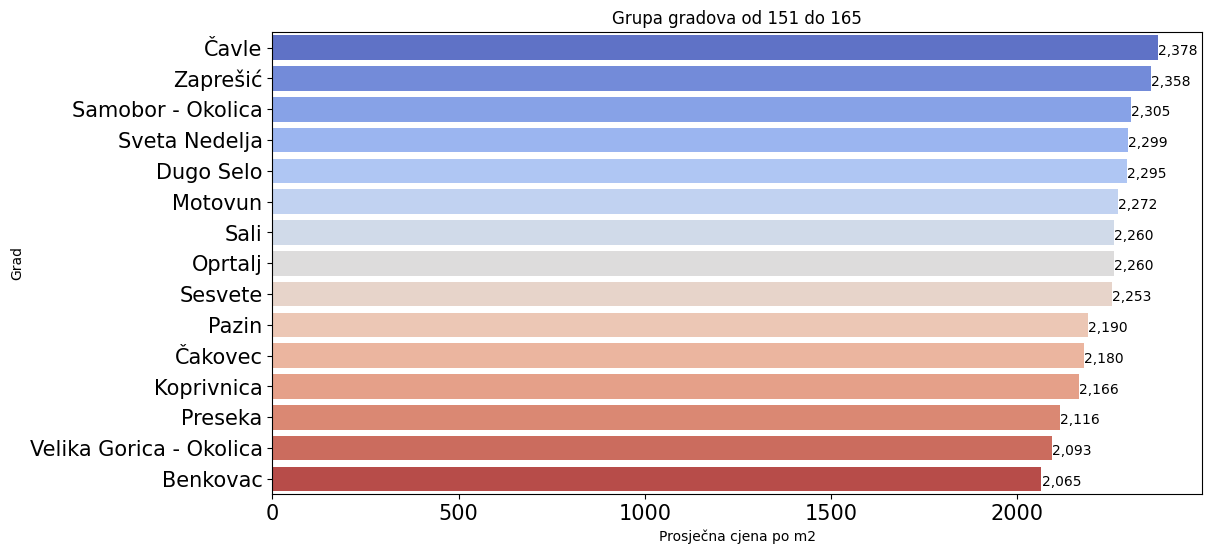

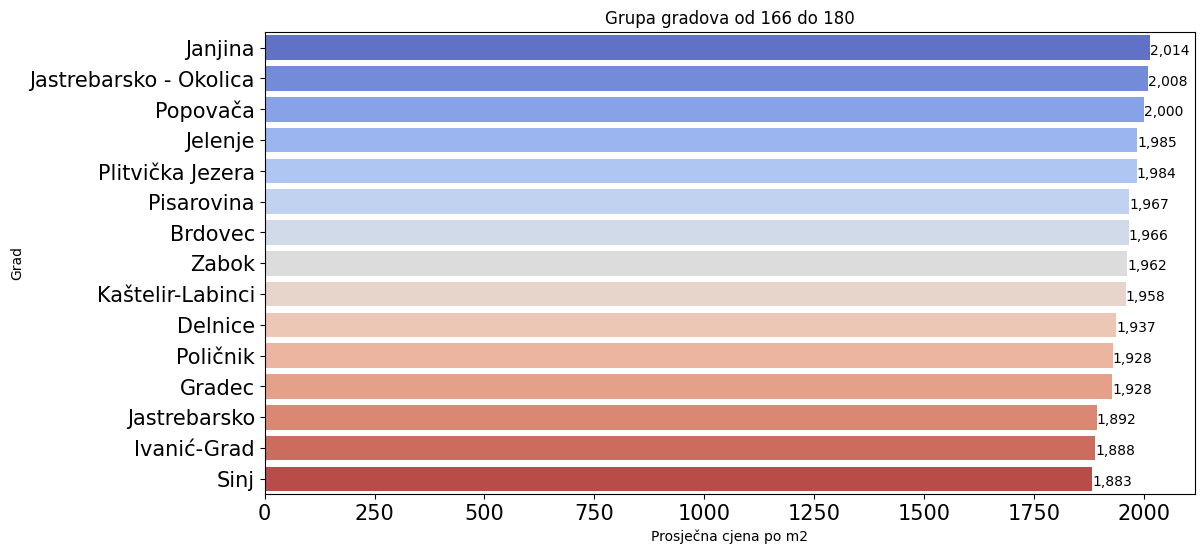

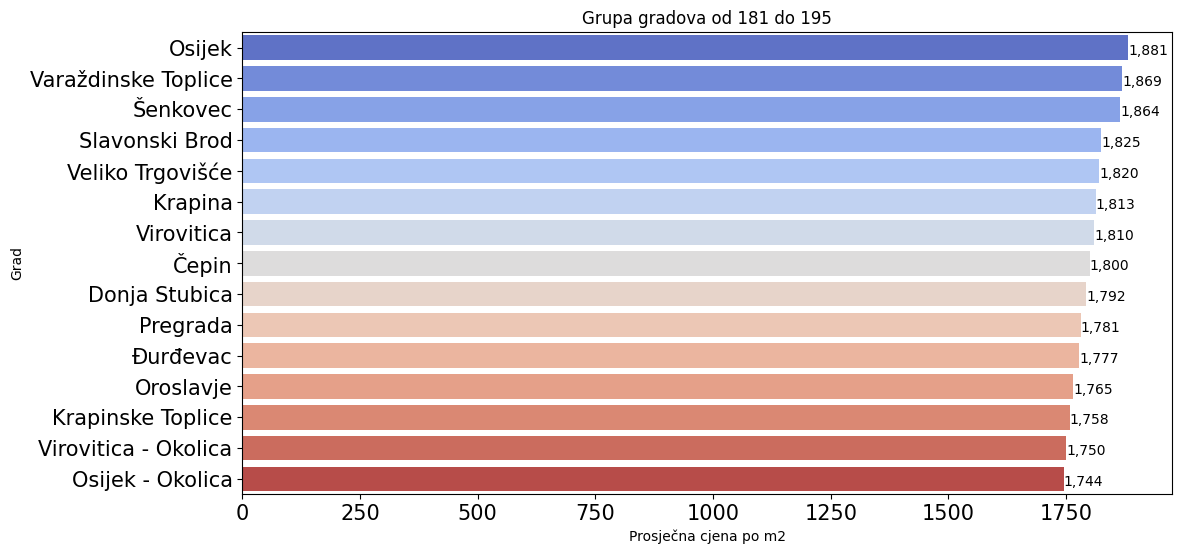

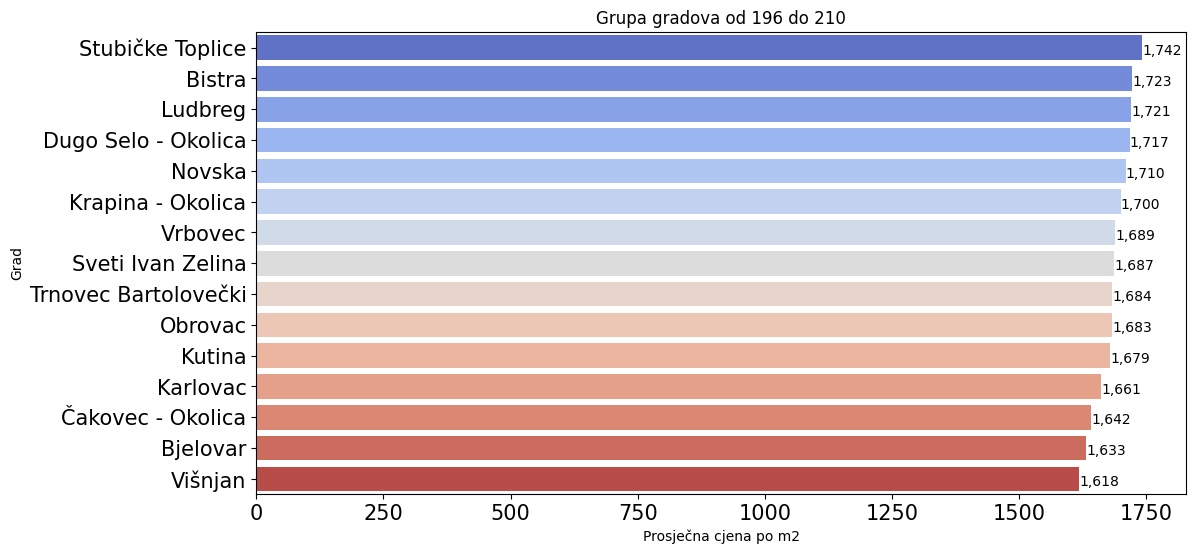

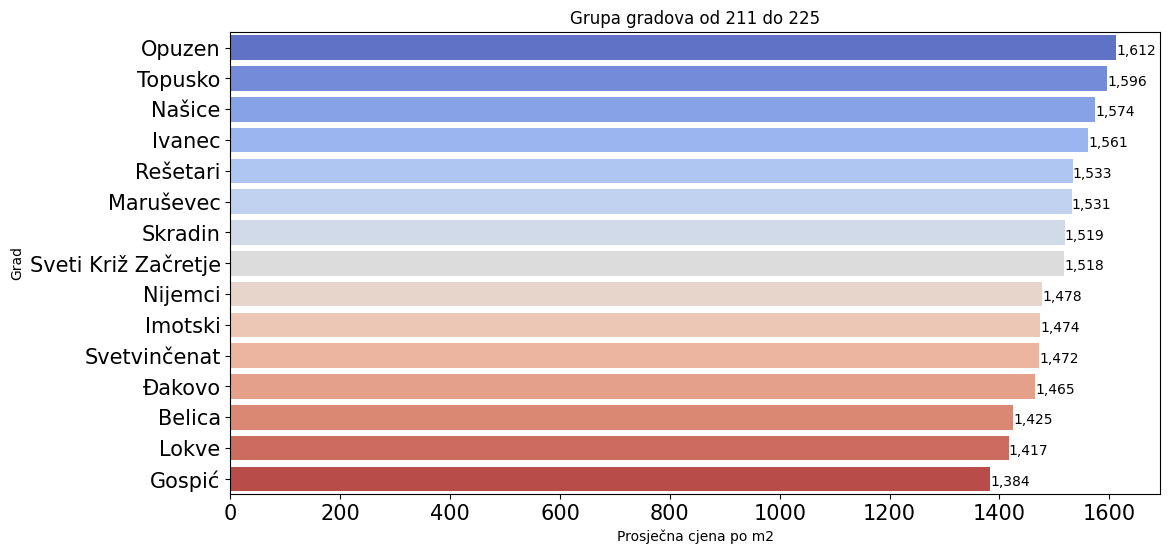

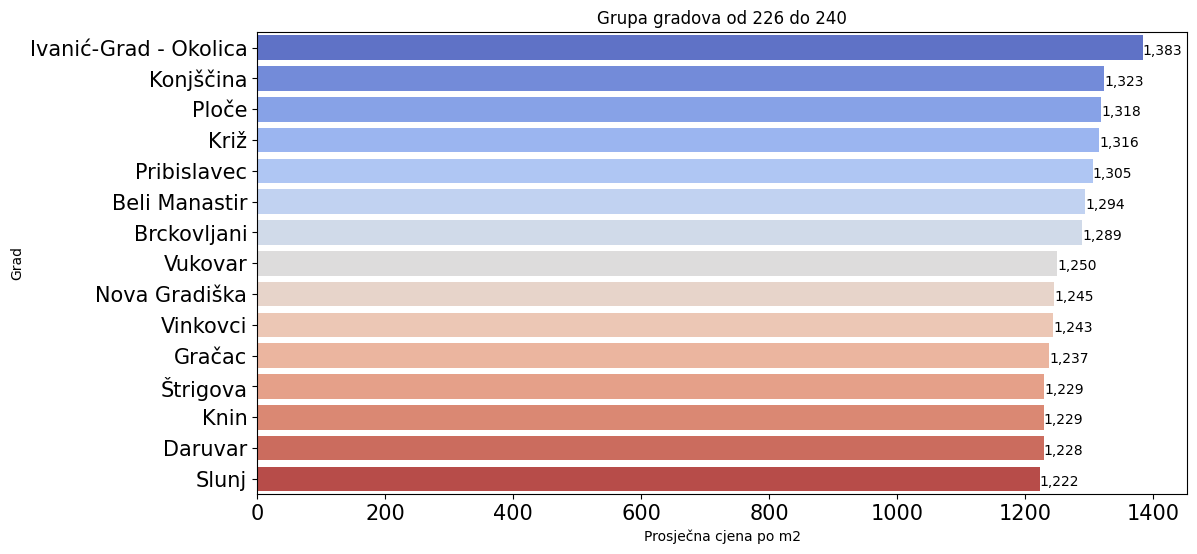

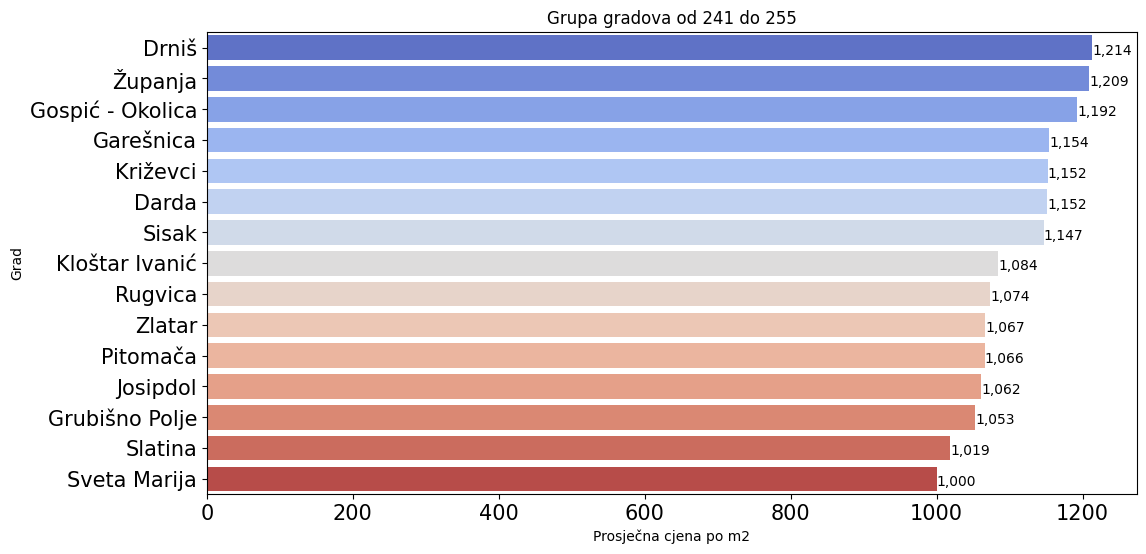

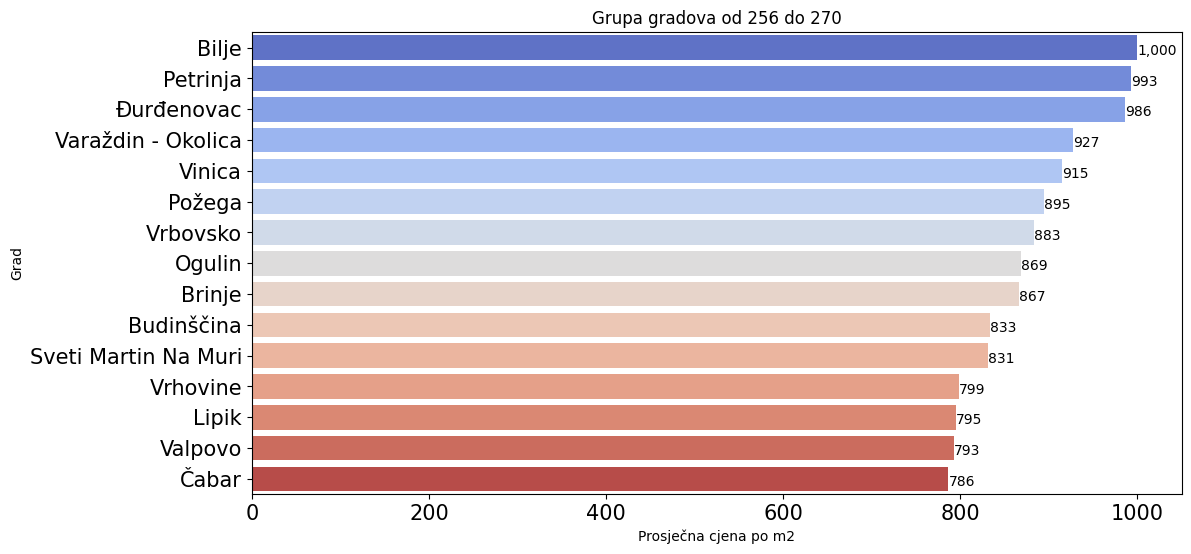

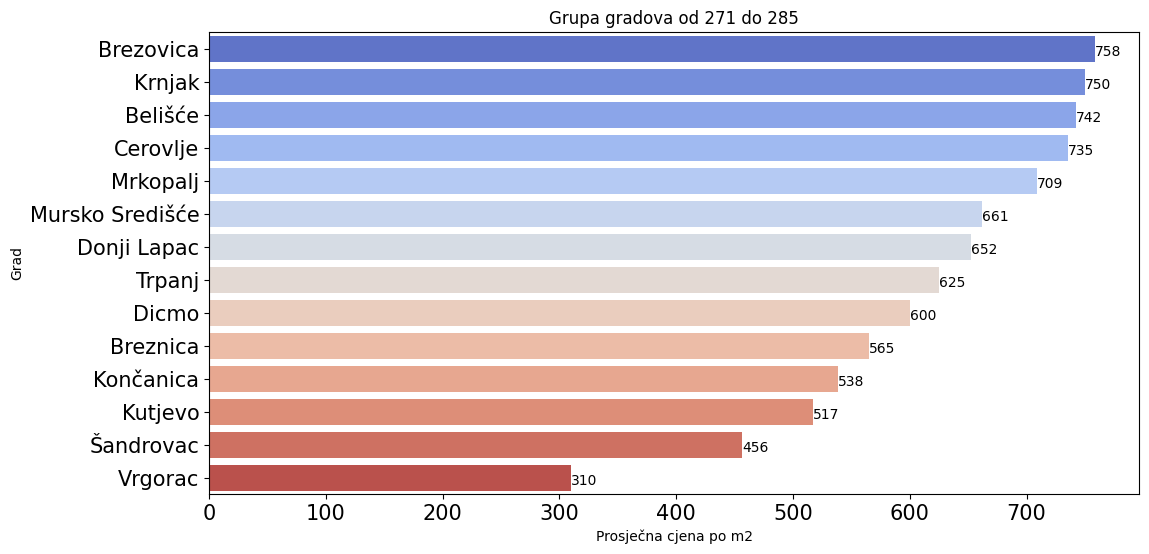

In [5]:
# Assuming df is your DataFrame and it has columns 'city' and 'cost_per_sqm'
grouped = df.groupby('city')['cost_per_sqm'].mean().sort_values(ascending=False)
group_size = 15

# Create a list of city groups
city_groups = [grouped[n:n+group_size] for n in range(0, len(grouped), group_size)]
cmap = sns.color_palette("coolwarm", len(grouped))
for i, group in enumerate(city_groups):
    plt.figure(i, figsize=(12, 6))
    # Create a color map
    cmap = sns.color_palette("coolwarm", len(group))
    # Create a bar plot with the color map
    sns.barplot(y=group.index, x=group.values, palette=cmap, hue=group.index)
    plt.ylabel('Grad')
    plt.xlabel('Prosječna cjena po m2')
    # Include the median for each city
    for x, y in enumerate(group.values):
        plt.text(y + 0.1, x + 0.1, f'{y:,.0f}', va='center')
    # Include the ranking in the title
    plt.title(f'Grupa gradova od {i*group_size+1} do {i*group_size+group_size}')
    plt.tick_params(axis='both', labelsize=group_size)
    plt.show()

### Prikaz razlike između 5 najskupljih i 5 najjeftinijih gradova po cijeni kvadratnog metra

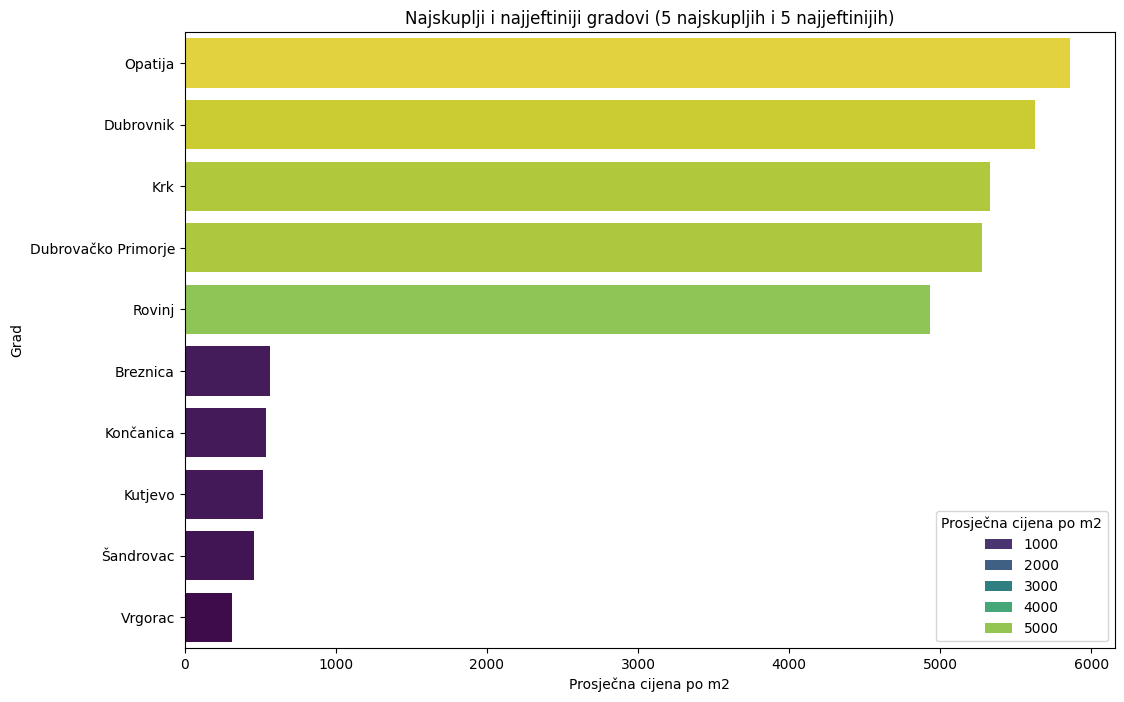

In [6]:
# Select top and bottom N cities
top_n = 5  # You can adjust this value based on your preference
bottom_n = 5
top_bottom_cities = pd.concat([avg_cost_per_sqm.head(top_n), avg_cost_per_sqm.tail(bottom_n)])

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot using seaborn
sns.barplot(x='cost_per_sqm', y='city', data=top_bottom_cities, palette='viridis', hue='cost_per_sqm')

# Set plot labels and title
plt.xlabel('Prosječna cijena po m2')
plt.ylabel('Grad')
plt.title(f'Najskuplji i najjeftiniji gradovi ({top_n} najskupljih i {bottom_n} najjeftinijih)')

# Change the legend title
plt.legend(title='Prosječna cijena po m2')

# Set smaller font size for better readability
plt.tick_params(axis='both', labelsize=10)

# Show the plot
plt.show()

### Stanovi po broju soba

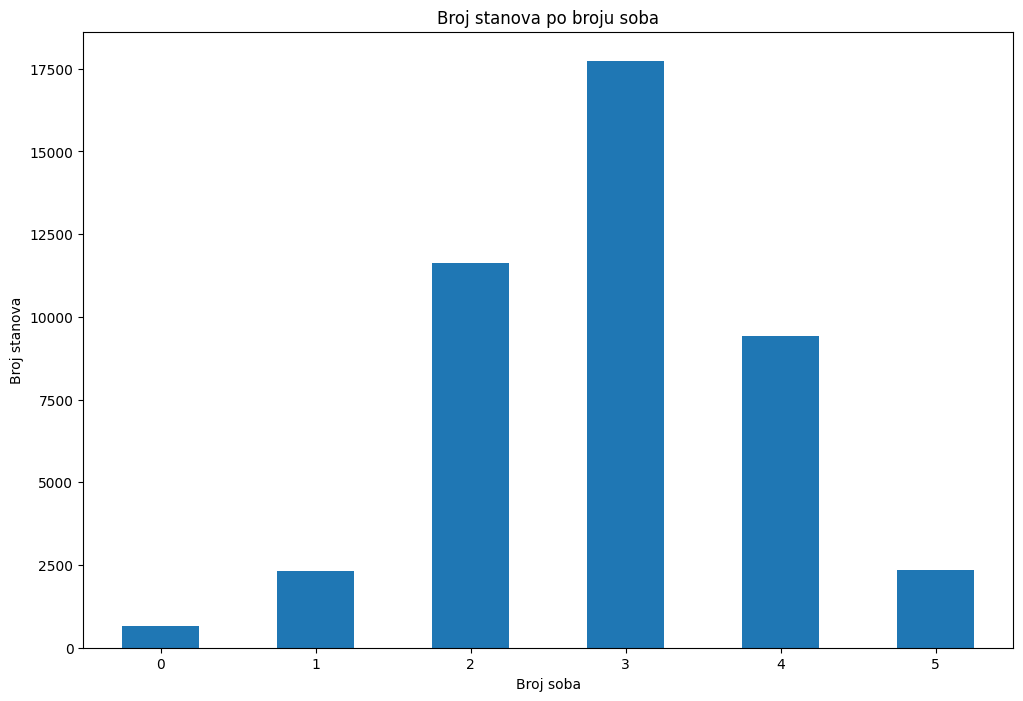

In [7]:
# Count the number of apartments by number of rooms
count_by_rooms = df.groupby('numberOfRooms')['numberOfRooms'].count()
# Create a bar plot
count_by_rooms.plot.bar(figsize=(12, 8))
# Set plot labels and title
plt.xlabel('Broj soba')
plt.ylabel('Broj stanova')
plt.title('Broj stanova po broju soba')
# Rotate the x-axis labels
plt.xticks(rotation=0)
# Show the plot
plt.show()

### Gradovi sa najviše stanova

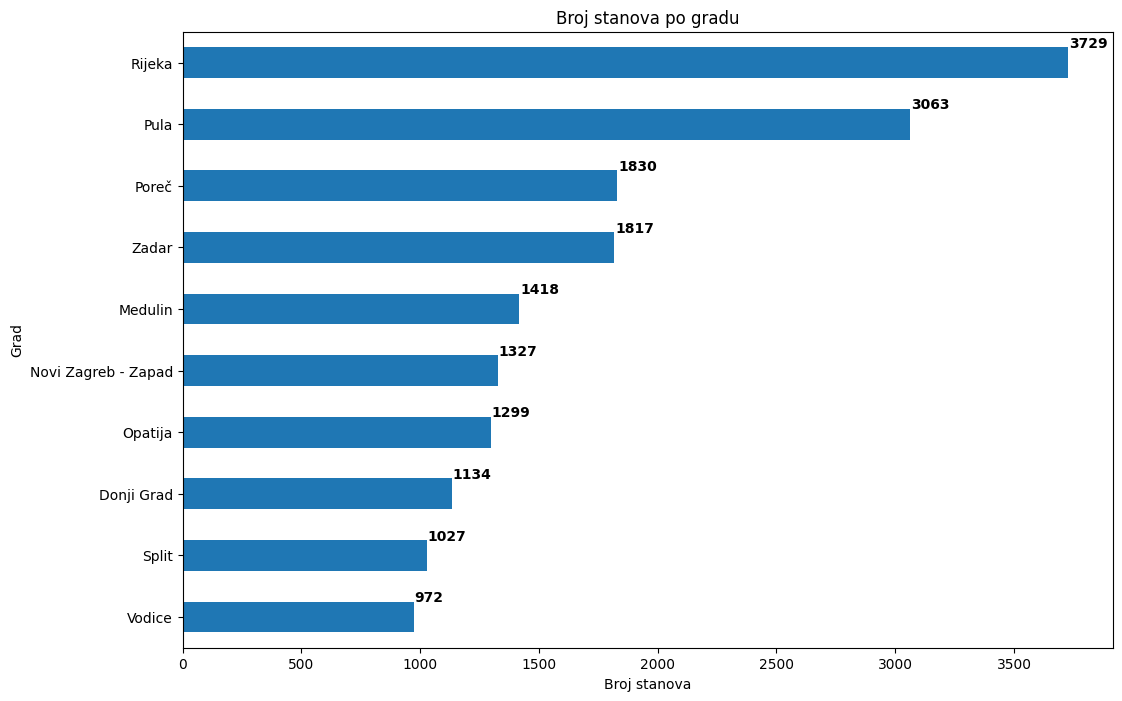

In [28]:
# Count the number of apartments for each city and sort them in descending order
count_by_city = df.groupby('city')['city'].count().sort_values(ascending=True)
# Select the top 10 cities and plot them
count_by_city.tail(10).plot.barh(figsize=(12, 8))
# Set plot labels and title
plt.xlabel('Broj stanova')
plt.ylabel('Grad')
plt.title('Broj stanova po gradu')
# Add the number of apartments for each city
for i, v in enumerate(count_by_city.tail(10)):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
# Show the plot
plt.show()

### Heatmap korelacije između karakteristika stanova

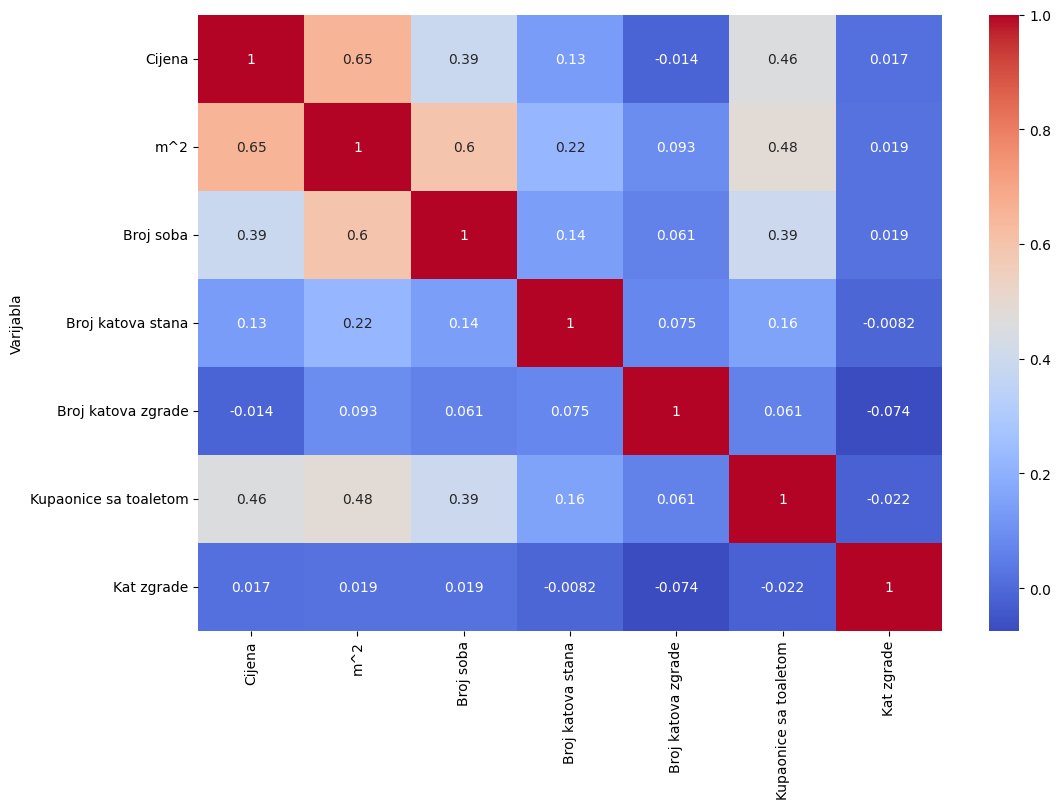

In [9]:
# A correlation heatmap for price, livingArea, numberOfRooms, flatFloorCount, fflatBuildingtype

# Select the columns to be included in the heatmap
columns = ['price', 'livingArea', 'numberOfRooms', 'flatFloorCount', 'flatBuildingtype', 'bathrooms with toilet', 'buildingFloorPosition']
# Create a correlation matrix
corr = df[columns].corr()
# Change the figure size
plt.figure(figsize=(12, 8))
# Change the name of the columns for better readability
corr = corr.rename(columns={'price': 'Cijena', 'livingArea': 'm^2', 'numberOfRooms': 'Broj soba', 'flatFloorCount': 'Broj katova stana', 'flatBuildingtype': 'Broj katova zgrade', 'bathrooms with toilet': 'Kupaonice sa toaletom', 'buildingFloorPosition': 'Kat zgrade'})
# Change the name of the index for better readability
corr.index = corr.index.rename('Varijabla')
# Change the names of the y-axis labels for better readability
corr = corr.rename(index={'price': 'Cijena', 'livingArea': 'm^2', 'numberOfRooms': 'Broj soba', 'flatFloorCount': 'Broj katova stana', 'flatBuildingtype': 'Broj katova zgrade', 'bathrooms with toilet': 'Kupaonice sa toaletom', 'buildingFloorPosition': 'Kat zgrade'})
# Create a heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

# Drugi dio

## 5 najskupljih i 5 najjeftinijih županija

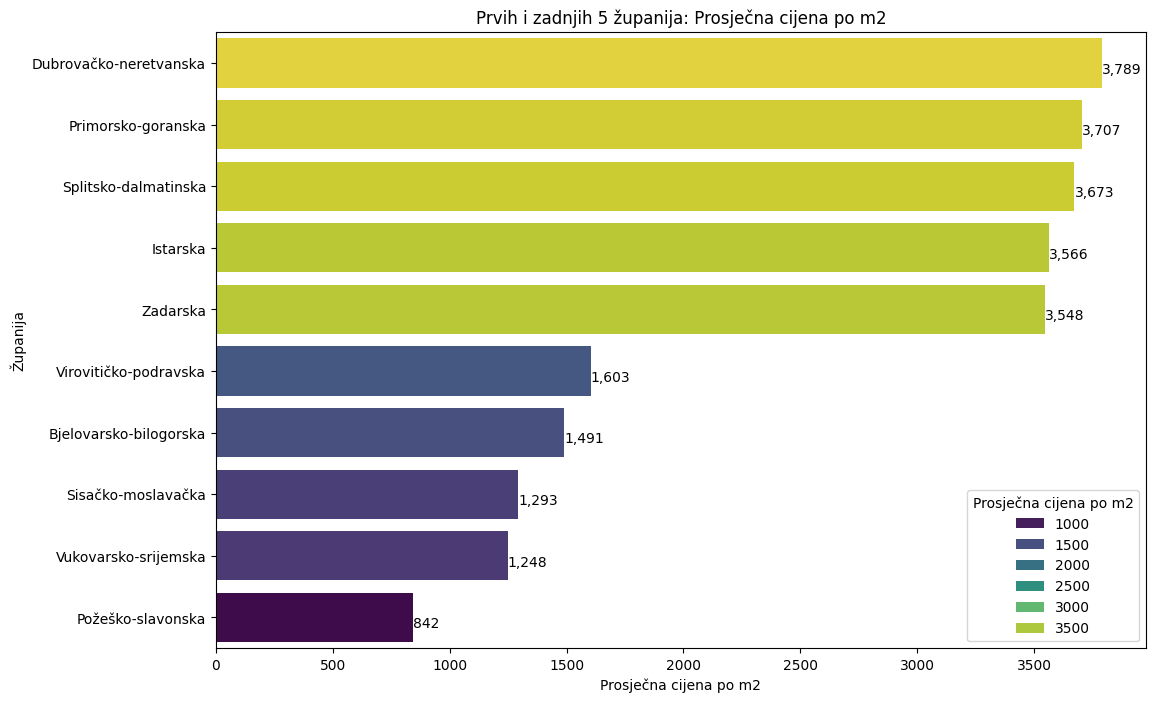

In [35]:
# Calculate the average price per square meter for each county
avg_price_per_sqm = df.groupby('county')['cost_per_sqm'].mean().sort_values(ascending=False).reset_index()
# Select the top 5 and bottom 5 counties and plot them
top_bottom_counties = pd.concat([avg_price_per_sqm.head(5), avg_price_per_sqm.tail(5)])
# Change the figure size
plt.figure(figsize=(12, 8))
# Create a bar plot using seaborn
sns.barplot(x='cost_per_sqm', y='county', data=top_bottom_counties, palette='viridis', hue='cost_per_sqm')
# Change the title of the color bar
plt.gca().legend().set_title('Prosječna cijena po m2')
# Set plot labels and title
plt.xlabel('Prosječna cijena po m2')
plt.ylabel('Županija')
plt.title('Prvih i zadnjih 5 županija: Prosječna cijena po m2')
# Append the average price per square meter to the plot
for x, y in enumerate(top_bottom_counties['cost_per_sqm']):
    plt.text(y + 0.1, x + 0.1, f'{y:,.0f}', va='center')
# Show the plot
plt.show()


### Broj stanova za te županije

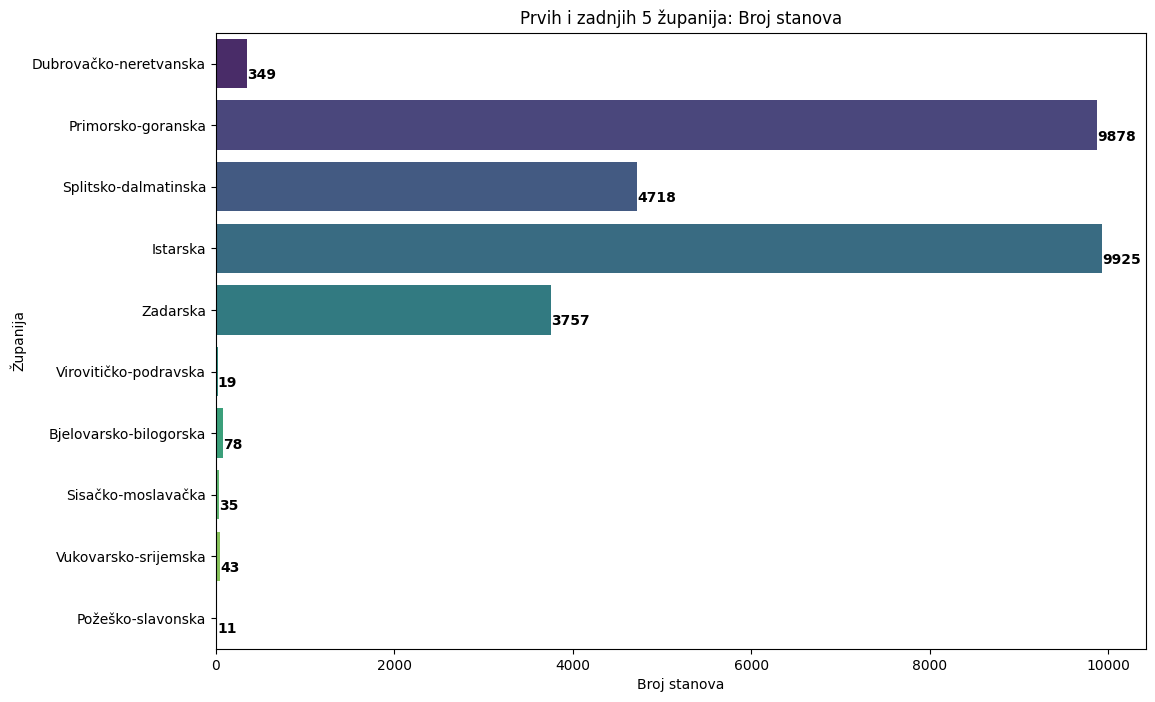

In [48]:
# Calculate the average price per square meter for each county
avg_price_per_sqm = df.groupby('county')['cost_per_sqm'].mean().sort_values(ascending=False).reset_index()

# Select the top 5 and bottom 5 counties
top_bottom_counties = pd.concat([avg_price_per_sqm.head(5), avg_price_per_sqm.tail(5)])

# Get the number of apartments for the top and bottom 5 counties
count_by_county = df[df['county'].isin(top_bottom_counties['county'])].groupby('county')['county'].count()

# Sort the count_by_county dataframe by the order of top_bottom_counties
count_by_county = count_by_county.reindex(top_bottom_counties['county'])

# Plot the number of apartments for the top and bottom 5 counties
plt.figure(figsize=(12, 8))
sns.barplot(x=count_by_county.values, y=count_by_county.index, palette='viridis', hue=count_by_county.index)
plt.xlabel('Broj stanova')
plt.ylabel('Županija')
plt.title('Prvih i zadnjih 5 županija: Broj stanova')
for x, y in enumerate(count_by_county.values):
    plt.text(y + 3, x + .25, str(y), color='black', fontweight='bold')
plt.show()

### Prosječna veličina stana u 5 najskupljih i 5 najjeftinijih županija

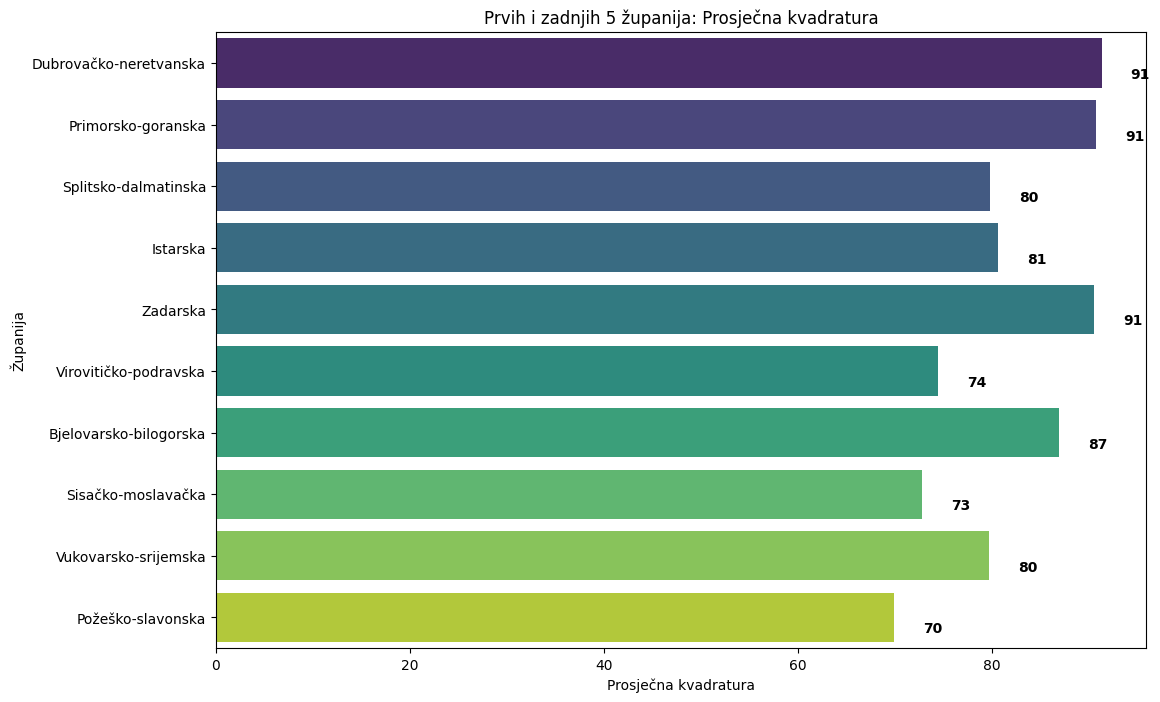

In [51]:
# Get the top and bottom 5 counties by average price per square meter
top_bottom_counties = pd.concat([avg_price_per_sqm.head(5), avg_price_per_sqm.tail(5)])
# Calculate the average living area for the top and bottom 5 counties
avg_living_area = df[df['county'].isin(top_bottom_counties['county'])].groupby('county')['livingArea'].mean()
# Sort the avg_living_area dataframe by the order of top_bottom_counties
avg_living_area = avg_living_area.reindex(top_bottom_counties['county'])
# Plot the average living area for the top and bottom 5 counties
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_living_area.values, y=avg_living_area.index, palette='viridis', hue=avg_living_area.index)
plt.xlabel('Prosječna kvadratura')
plt.ylabel('Županija')
plt.title('Prvih i zadnjih 5 županija: Prosječna kvadratura')
for x, y in enumerate(avg_living_area.values):
    plt.text(y + 3, x + .25, f'{y:,.0f}', color='black', fontweight='bold')
plt.show()

# Treći dio

## Splitsko-Dalmatinska županija i Split

### Gradovi Splitsko-Dalmatinske županije po prosječnoj cijeni kvadratnog metra

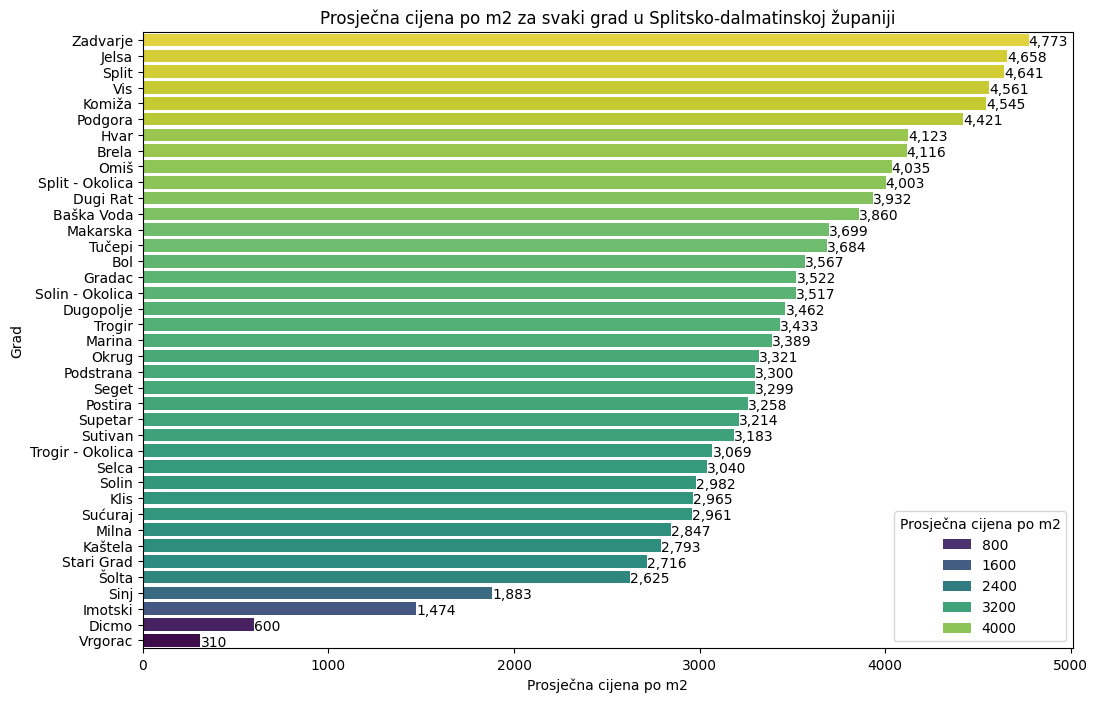

In [11]:
# Get all the apartments in the Split-Dalmatia county
split_dalmatia = df[df['county'] == 'Splitsko-dalmatinska']
# Calculate the average price per square meter for each city in the Split-Dalmatia county
avg_price_per_sqm_split_dalmatia = split_dalmatia.groupby('city')['cost_per_sqm'].mean().sort_values(ascending=False).reset_index()
# Plot the average price per square meter for each city in the Split-Dalmatia county
plt.figure(figsize=(12, 8))
sns.barplot(x='cost_per_sqm', y='city', data=avg_price_per_sqm_split_dalmatia, palette='viridis', hue='cost_per_sqm')
plt.gca().legend().set_title('Prosječna cijena po m2')
plt.xlabel('Prosječna cijena po m2')
plt.ylabel('Grad')
plt.title('Prosječna cijena po m2 za svaki grad u Splitsko-dalmatinskoj županiji')
for x, y in enumerate(avg_price_per_sqm_split_dalmatia['cost_per_sqm']):
    plt.text(y + 0.1, x + 0.1, f'{y:,.0f}', va='center')
plt.show()

### Prosječan broj soba po gradu u Splitsko-Dalmatinskoj županiji

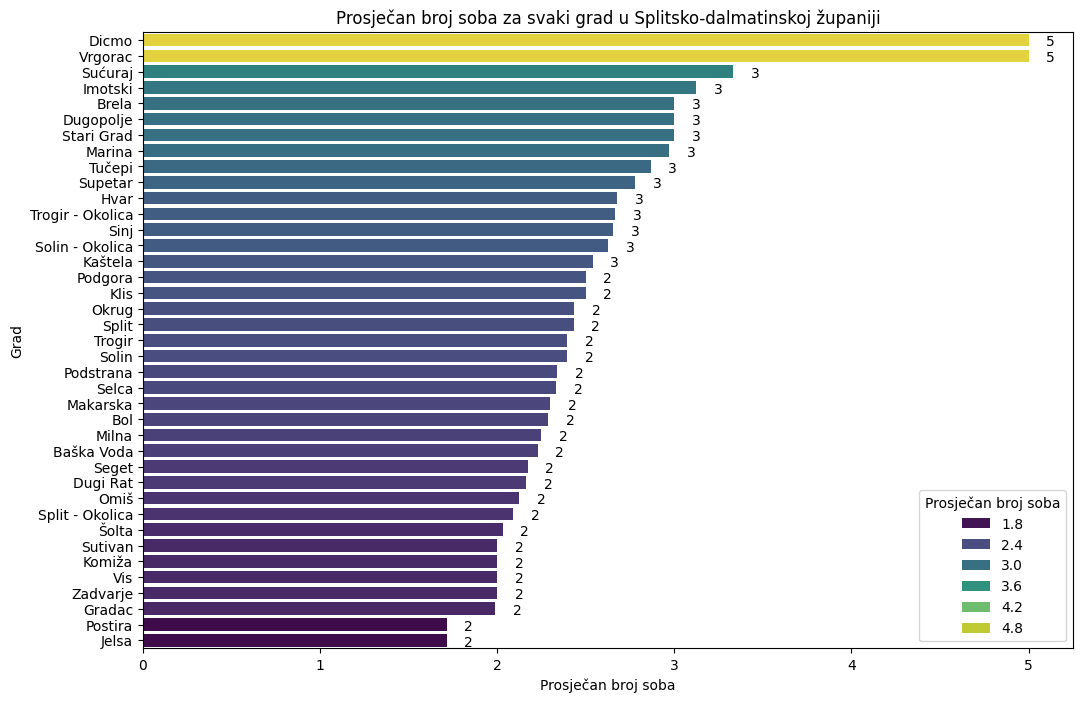

In [12]:
# Calculate the average number of rooms for each city in the Split-Dalmatia county
avg_rooms_split_dalmatia = split_dalmatia.groupby('city')['numberOfRooms'].mean().sort_values(ascending=False).reset_index()
# Plot the average number of rooms for each city in the Split-Dalmatia county
plt.figure(figsize=(12, 8))
sns.barplot(x='numberOfRooms', y='city', data=avg_rooms_split_dalmatia, palette='viridis', hue='numberOfRooms')
plt.gca().legend().set_title('Prosječan broj soba')
plt.xlabel('Prosječan broj soba')
plt.ylabel('Grad')
plt.title('Prosječan broj soba za svaki grad u Splitsko-dalmatinskoj županiji')
for x, y in enumerate(avg_rooms_split_dalmatia['numberOfRooms']):
    plt.text(y + 0.1, x + 0.1, f'{y:,.0f}', va='center')
plt.show()

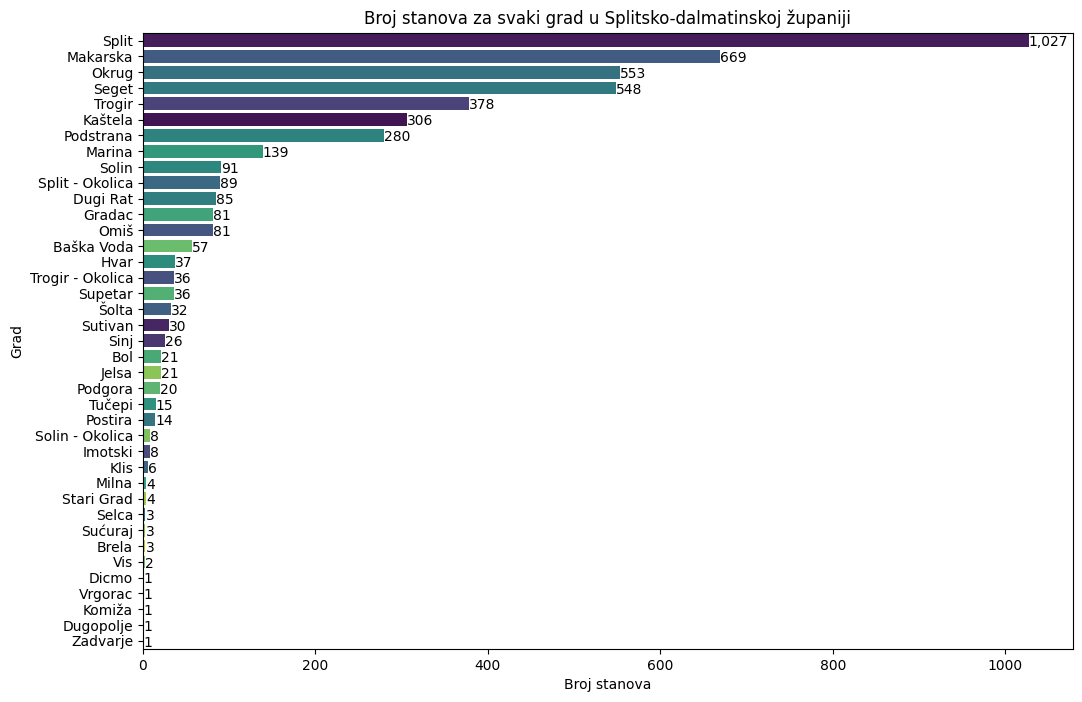

In [13]:
# Plot the number of apartments for each city in the Split-Dalmatia county
plt.figure(figsize=(12, 8))
sns.countplot(y='city', data=split_dalmatia, palette='viridis', order=split_dalmatia['city'].value_counts().index, hue='city')
plt.xlabel('Broj stanova')
plt.ylabel('Grad')
plt.title('Broj stanova za svaki grad u Splitsko-dalmatinskoj županiji')
# Add the number of apartments for each city to the plot
for x, y in enumerate(split_dalmatia['city'].value_counts()):
    plt.text(y + 0.1, x + 0.1, f'{y:,.0f}', va='center')
plt.show()

# Split

### Prvih 5 i zadnjih 5 stanova po prosječnoj cijeni metra kvadratnog

Pogledati stanove i komentirati

In [14]:
# Get the top 5 and bottom 5 apartments in Split by price per square meter
split = df[df['city'] == 'Split']
top_bottom_split = pd.concat([split.head(5), split.tail(5)])
# Sort the apartments by price per square meter in descending order
top_bottom_split = top_bottom_split.sort_values(by='cost_per_sqm', ascending=False)
# Print the top 5 and bottom 5 apartments in Split by price per square meter
print(top_bottom_split[['city', 'price', 'livingArea', 'cost_per_sqm']].head(5))
print(top_bottom_split[['city', 'price', 'livingArea', 'cost_per_sqm']].tail(5))
# Print the full url for the top 5 and bottom 5 apartments in Split by price per square meter
pd.set_option('display.max_colwidth', None)
print(top_bottom_split['url'].head(5))
print(top_bottom_split['url'].tail(5))

        city      price  livingArea  cost_per_sqm
43781  Split  1200000.0        65.0  18461.538462
43599  Split  1000000.0        77.0  12987.012987
43700  Split  1100000.0       214.0   5140.186916
43996  Split  1500000.0       315.0   4761.904762
43587  Split  1000000.0       226.0   4424.778761
       city     price  livingArea  cost_per_sqm
591   Split   83000.0        21.0   3952.380952
1424  Split  103000.0        27.0   3814.814815
861   Split   90782.0        24.0   3782.583333
1332  Split  100000.0       111.0    900.900901
176   Split   60000.0       100.0    600.000000
43781                      https://www.njuskalo.hr/nekretnine/lux-stan-dioklecijanovoj-palaci-oglas-41610349
43599                             https://www.njuskalo.hr/nekretnine/stan-centaru-grada-split-oglas-41485514
43700                                  https://www.njuskalo.hr/nekretnine/dvoetazni-penthouse-oglas-30529160
43996    https://www.njuskalo.hr/nekretnine/split-centar-luksuzan-5soban-dvoetazni-st

### Usporedba Dubrovačko-Neretvanske i Primorsko-Goranske županije sa Splitsko-Dalmatinskom

            city     price  livingArea  cost_per_sqm  \
41385  Dubrovnik  590000.0        49.0  12040.816327   

                                                                                             url  
41385  https://www.njuskalo.hr/nekretnine/stan-prodaja-dubrovnik-stari-grad-49-m2-oglas-39925849  
          city      price  livingArea  cost_per_sqm  \
44092  Opatija  2700000.0       164.0  16463.414634   

                                                                                                url  
44092  https://www.njuskalo.hr/nekretnine/opatija-luksuzni-stan-164-m2-prvi-red-mora-oglas-39533490  
        city      price  livingArea  cost_per_sqm  \
43781  Split  1200000.0        65.0  18461.538462   

                                                                                     url  
43781  https://www.njuskalo.hr/nekretnine/lux-stan-dioklecijanovoj-palaci-oglas-41610349  


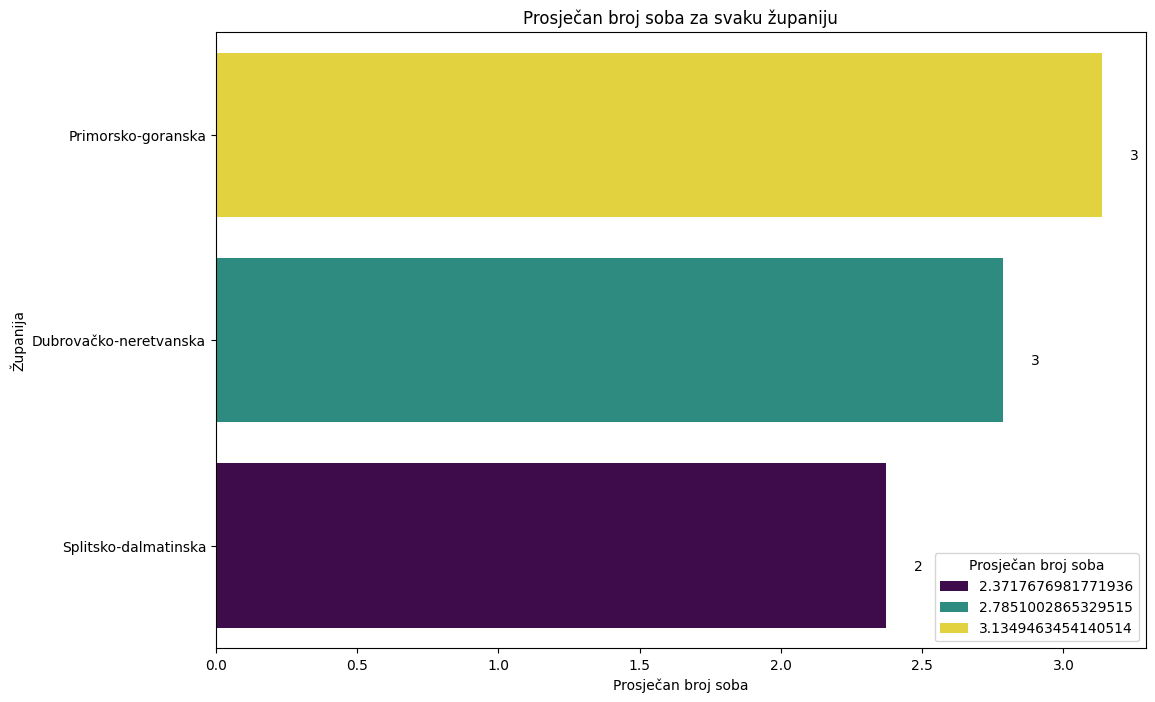

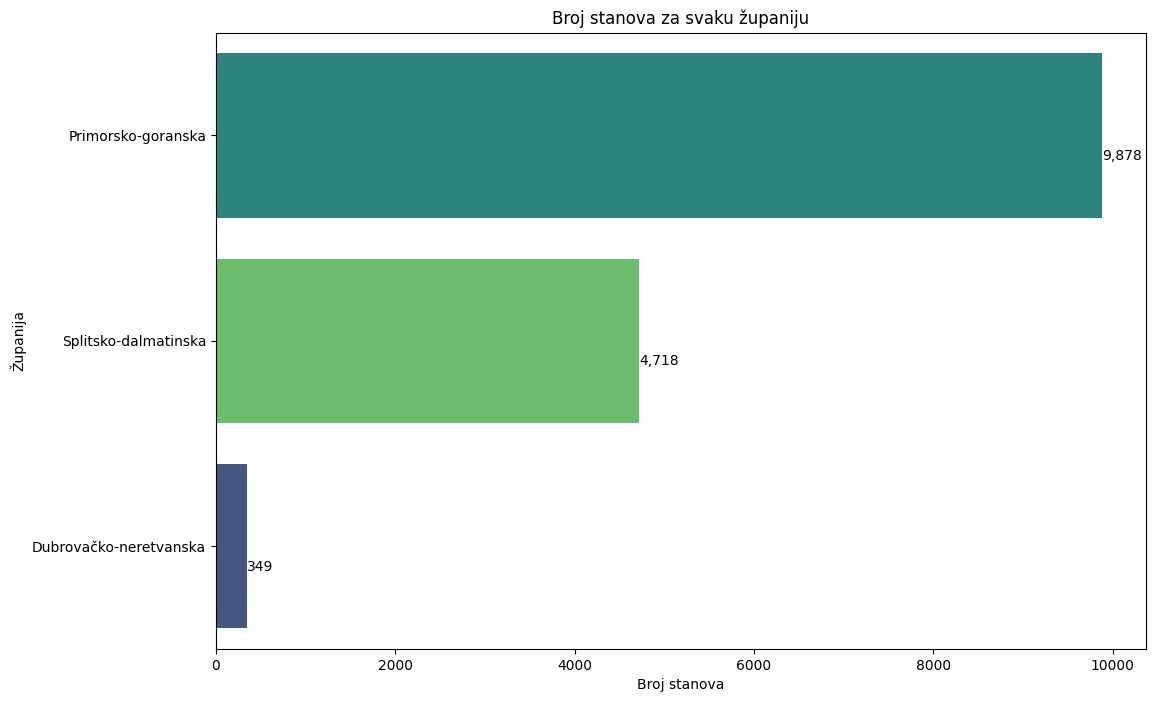

In [27]:
# Get the apartments for the Dubrovnik-Neretva county, Primorsko-Goranaska county and the Split-Dalmatia county
dubrovnik_neretva = df[df['county'] == 'Dubrovačko-neretvanska']
primorsko_goranska = df[df['county'] == 'Primorsko-goranska']
split_dalmatia = df[df['county'] == 'Splitsko-dalmatinska']

# For each county, get the apartment with the highest price per square meter
dubrovnik_neretva_stan = dubrovnik_neretva[dubrovnik_neretva['cost_per_sqm'] == dubrovnik_neretva['cost_per_sqm'].max()]
primorsko_goranska_stan = primorsko_goranska[primorsko_goranska['cost_per_sqm'] == primorsko_goranska['cost_per_sqm'].max()]
split_dalmatia_stan = split_dalmatia[split_dalmatia['cost_per_sqm'] == split_dalmatia['cost_per_sqm'].max()]

# Print the apartments with the highest price per square meter for each county
print(dubrovnik_neretva_stan[['city', 'price', 'livingArea', 'cost_per_sqm', 'url']])
print(primorsko_goranska_stan[['city', 'price', 'livingArea', 'cost_per_sqm', 'url']])
print(split_dalmatia_stan[['city', 'price', 'livingArea', 'cost_per_sqm', 'url']])

# Get the average number of rooms for each county and plot them
counties = pd.concat([dubrovnik_neretva, primorsko_goranska, split_dalmatia])
avg_rooms_county = counties.groupby('county')['numberOfRooms'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='numberOfRooms', y='county', data=avg_rooms_county, palette='viridis', hue='numberOfRooms')
plt.gca().legend().set_title('Prosječan broj soba')
plt.xlabel('Prosječan broj soba')
plt.ylabel('Županija')
plt.title('Prosječan broj soba za svaku županiju')
for x, y in enumerate(avg_rooms_county['numberOfRooms']):
    plt.text(y + 0.1, x + 0.1, f'{y:,.0f}', va='center')
plt.show()

# Count the number of apartments for top 3 counties and plot them
plt.figure(figsize=(12, 8))
sns.countplot(y='county', data=counties, palette='viridis', order=counties['county'].value_counts().index, hue='county')
plt.xlabel('Broj stanova')
plt.ylabel('Županija')
plt.title('Broj stanova za svaku županiju')
for x, y in enumerate(counties['county'].value_counts()):
    plt.text(y + 0.1, x + 0.1, f'{y:,.0f}', va='center')
plt.show()